# Menganalisis Risiko Gagal Bayar Peminjam

Tugas Anda adalah menyiapkan laporan untuk divisi kredit suatu bank. Anda akan mencari tahu pengaruh status perkawinan seorang nasabah dan jumlah anak yang dimilikinya terhadap probabilitas gagal bayar dalam pelunasan pinjaman. Pihak bank sudah memiliki beberapa data mengenai kelayakan kredit nasabah.

Laporan Anda akan dipertimbangkan pada saat membuat **penilaian kredit** untuk calon nasabah. **Penilaian kredit** digunakan untuk mengevaluasi kemampuan calon peminjam untuk melunasi pinjaman mereka.

# Daftar Isi

* [Tujuan Proyek](#tujuan)
* [Import Library dan Membaca Dataset](#import)
* [Eksplorasi Data](#explore)
    * [Kesimpulan Eksplorasi Data](#summary_data)
* [Transformasi Data](#transformation_data)
    * [Memperbaiki Kolom `education`](#education_column)
    * [Kolom : `children`](#children_column)
    * [Kolom : `days_employed`](#days_employed_column)
    * [Kolom : `dob_years`](#dob_years_column)
    * [Kolom : `family_status`](#family_status_column)
    * [Kolom : `gender`](#gender_column)
    * [Kolom : `income_type`](#income_type__column)
* [Bekerja dengan Nilai yang Hilang](#null_data)
    * [Kolom : `total_income`](#null_total_income)
    * [Kolom : `days_employed`](#null_days_employed)
* [Pengkategorian Data](#category_data)
    * [Kolom : `children`](#category_children)
    * [Kolom : `education`](#category_education)
    * [Kolom : `family_status`](#category_family_status)
    * [Kolom : `purpose`](#category_purpose)
    * [Kolom : `total_income`](#category_total_income)
    * [Kolom : `age`](#category_age)
    * [Kolom : `debt`](#category_debt)
* [Memeriksa Hipotesis](#check_hypothesis)
    * [Jumlah Anak](#children_number)
    * [Status Keluarga](#family_status)
    * [Tingkat Pendapatan](#total_income)
    * [Tujuan](#purpose)
* [Kesimpulan Umum](#general_conclusion)    

# Tujuan Proyek <a id='tujuan'></a>
**Tujuan dari proyek ini adalah:**
1. Mengidentifikasi nilai-nilai yang hilang
2. Mengganti tipe data menjadi tipe data yang dibutuhkan
3. Menghapus data duplikat
4. Mengkategorikan data

**Analisis data untuk menjawab apakah ada hubungan antara gagal bayar dengan:**
1. Jumlah anak
2. Status perkawinan
3. Tingkat pendapatan
4. Tujuan peminjaman

# Buka *file* data dan baca informasi umumnya. <a id='import'></a>

In [386]:
# Muat semua *library*
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer 
from IPython.core.pylabtools import figsize

In [387]:
# Memuat Data
cs_data = pd.read_csv('/datasets/credit_scoring_eng.csv')

# Eksplorasi data <a id='explore'></a>

**Deskripsi Data**
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - pengidentifikasi untuk status perkawinan nasabah
- `family_status_id` - tanda pengenal status perkawinan
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah pernah melakukan gagal bayar pinjaman
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman

In [388]:
# Mari kita lihat berapa banyak baris dan kolom yang dimiliki oleh dataset kita
cs_data.shape

(21525, 12)

In [389]:
# Mari tampilkan N baris pertama
cs_data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [390]:
cs_data.tail()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car
21524,2,-1984.507589,40,secondary education,1,married,0,F,employee,0,13127.587,to buy a car


In [391]:
cs_data.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16708,1,-1213.419276,48,bachelor's degree,0,married,0,M,employee,0,51621.924,cars
10842,0,-2705.749355,48,secondary education,1,married,0,F,employee,0,16648.693,buy real estate
2109,0,-456.476062,28,SECONDARY EDUCATION,1,unmarried,4,M,employee,0,19592.626,to get a supplementary education
9916,0,373994.339305,57,bachelor's degree,0,divorced,3,F,retiree,0,17811.661,car
10228,1,-116.488779,38,secondary education,1,unmarried,4,F,employee,0,11290.431,buying property for renting out


**Terdapat beberapa keanehan dari sampel data, yaitu:**
* days_employed memiliki nilai negative (-) dan harusnya tipe data int bukan desimal (float)
* education memiliki pemformatan yang berbeda-beda (tidak seragam)
* purpose memiliki label yang tidak konsisten dan beragam dengan makna yang sama
* days_employed dan total_income dapat dibulatkan ke bilangan bulat terdekat

In [392]:
# Informasi umum dari dataset
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


* Berdasarkan dataset, kita mempunyai 12 kolom dan 21525 entri data, namun jumlah baris di kolom 'days employed' dan 'total_income' hanya memiliki 19351 baris, itu artinya kedua kolom itu memiliki nilai yang hilang (missing values) atau 'Nan'.
* Kita dapat melihat bahwa kolom dengan nilai yang hilang adalah kolom yang memiliki tipe data float.

In [393]:
# Mari kita lihat tabel yang telah difilter dengan nilai yang hilang di kolom pertama yang mengandung data yang hilang
cs_data.loc[cs_data['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


* Menurut pendapat saya data tersebut simetris. Jika kita melihat sekilas dari tabel bahwa baris yang nilainya hilang dari kolom 'days_employed' & 'total_income' sejajar atau muncul bersamaan, juga mengingat jumlah data di kedua kolom tersebut sama, yaitu 19351.
* Kemudian dengan asumsi kesalahan ini bisa saja disebabkan oleh kesalahan sistem, namun bisa saja calon nasabah/peminjam menolak untuk mencantumkan informasi tersebut dengan alasan tertentu. Terakhir yang menjadi pertimbangan juga kita harus memperhatikan bahwa 'days_employed' dan juga 'total_income' adalah 2 faktor penting dalam memberikan pinjaman dana.

In [394]:
cs_data.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


In [395]:
# Melihat jumlah baris data yang hilang 
print('Total Baris:', len(cs_data))
print('\nKolom\t\tBaris yang hilang')
cs_data.isna().sum()

Total Baris: 21525

Kolom		Baris yang hilang


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [396]:
# Mari kita terapkan beberapa kondisi untuk memfilter data dan melihat jumlah baris dalam tabel yang telah difilter.
cs_data_null = cs_data.loc[(cs_data['days_employed'].isna()) & (cs_data['total_income'].isna())]
cs_data_null.shape

(2174, 12)

**Kesimpulan sementara**

* Jumlah baris dalam tabel yang telah difilter sesuai dengan jumlah nilai yang hilang, yaitu 2174 baris.
* Kita bisa menyimpulkan bahwa asumsi diawal adalah benar, di mana nilai yang hilang simetris dengan jumlah baris dalam tabel.

In [397]:
# Menghitung persentase nilai yang hilang
round((cs_data.isna().sum()/cs_data.shape[0]*100), 2)

children             0.0
days_employed       10.1
dob_years            0.0
education            0.0
education_id         0.0
family_status        0.0
family_status_id     0.0
gender               0.0
income_type          0.0
debt                 0.0
total_income        10.1
purpose              0.0
dtype: float64

In [398]:
# Membuat fungsi untuk menghitung persentase nilai yang hilang dan hanya menampilkan 2 kolom yang hilang

def missing_values_table(cs_data):
        # Total nilai yang hilang
        mis_val_total = cs_data.isnull().sum()
        
        # Persentase dari nilai yang hilang
        mis_val_percent = 100 * cs_data.isnull().sum() / len(cs_data)
        
        # Membuat tabel hasil
        mis_val_table = pd.concat([mis_val_total, mis_val_percent], axis=1)
        
        # Mengganti nama kolom
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'nilai yang hilang', 1 : '% dari nilai total data'})
        
        # Mensortir tabel berdasarkan persentase data yang hilang 
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% dari nilai total data', ascending=False).round(1)
        
        # Tampilkan informasi
        #print ("DataFrame yang digunakan ada " + str(cs_data.shape[1]) + " kolom.\n"      
            #"Terdapat " + str(mis_val_table_ren_columns.shape[0]) +
              #" yang memiliki nilai yang hilang.")
        
        return mis_val_table_ren_columns
missing_values_table(cs_data)

,nilai yang hilang,% dari nilai total data
days_employed,2174,10.1
total_income,2174,10.1


In [399]:
# Mengecek datat duplikat
print('Jumlah baris data duplikat:')
cs_data.duplicated().sum()

Jumlah baris data duplikat:


54

***Temuan Awal***
* 21525 baris
* 12 kolom
* dtypes: float64(2), int64(5), object(5)
* 2174 nilai yang hilang di 2 kolom (days_employed, total_income)
* Nilai days_employed dan total_income hilang lebih dari 10% dari nilai total
* Terdapat 54 baris duplikat

**Langkah selanjutnya**

* Dari pemrosesan nilai yang hilang di atas, kita dapat melihat bahwa sekitar 10% data yang hilang untuk berapa lama pelanggan telah bekerja "days_employed" dan pendapatan bulanan "total_income".
* Selanjutnya kita harus memutuskan apakah data yang hilang cukup rendah untuk menghapus baris dengan dropped data atau jika perlu mengganti data yang hilang dengan mean atau median.
* Kita melanjutkan untuk menentukan apakah data memiliki outlier yang signifikan dengan menentukan statistik ringkasan untuk baris dengan nilai yang hilang.

In [400]:
# Memeriksa outliers
round(cs_data.describe(), 2)

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.00,19351.00,21525.00,21525.00,21525.00,21525.00,19351.00
mean,0.54,63046.50,43.29,0.82,0.97,0.08,26787.57
std,1.38,140827.31,12.57,0.55,1.42,0.27,16475.45
min,-1.00,-18388.95,0.00,0.00,0.00,0.00,3306.76
25%,0.00,-2747.42,33.00,1.00,0.00,0.00,16488.50
50%,0.00,-1203.37,42.00,1.00,0.00,0.00,23202.87
75%,1.00,-291.10,53.00,1.00,1.00,0.00,32549.61
max,20.00,401755.40,75.00,4.00,4.00,1.00,362496.64


In [401]:
# Nilai absolut untuk day_employed, periksa outlier
days_employed_absolute = abs(cs_data['days_employed'])
days_employed_absolute.describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

In [402]:
# Nilai absolut untuk total_income, periksa outlier
total_income_absolute = abs(cs_data['total_income'])
total_income_absolute.describe()

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64

**Kemungkinan penyebab hilangnya nilai dalam data**
* Dari metode describe(), untuk kolom days_employed, rata-ratanya adalah 63046 dan mediannya adalah -1203,37. Ini berarti bahwa dataset mengandung outlier yang signifikan.
* Untuk kolom total_income, rata-ratanya adalah 26787 dan mediannya adalah 23202. Kita mungkin bisa mengganti nilai yang hilang di kolom ini dengan rata-rata atau median.
* Memeriksa melalui nilai-nilai yang hilang, saya mengamati bahwa nilai-nilai yang hilang menunjukkan pola 'sistematis'. Untuk setiap baris dengan data yang hilang, nilai days_employed dan total_income tidak ada. Artinya datanya "Missing not at random (MNAR)". Itu berarti mereka yang menolak memberikan informasi tentang hari kerja kemungkinan besar tidak akan memberikan informasi tentang total pendapatan mereka.
* Pemeriksaan cepat menggunakan nilai absolut di kolom days_employed memberikan rata-rata 66914 dan median 2194. Dengan hasil ini, dan standar deviasi yang tinggi, opsi terbaik adalah menghapus baris tersebut dengan nilai yang hilang untuk menghindari "variasi" atau "bias" dari analisa.
* Karena ukuran sampel cukup besar, kita dapat menghilangkan 10% data yang hilang tanpa kehilangan kekuatan statistik yang substansial.

In [403]:
# Memeriksa kolom children
cs_data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [404]:
# Memeriksa kolom days_employed
cs_data['days_employed'].value_counts()

-327.685916     1
-1580.622577    1
-4122.460569    1
-2828.237691    1
-2636.090517    1
               ..
-7120.517564    1
-2146.884040    1
-881.454684     1
-794.666350     1
-3382.113891    1
Name: days_employed, Length: 19351, dtype: int64

In [405]:
# Memeriksa kolom dob_years
cs_data['dob_years'].value_counts().sort_index()

0     101
19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [406]:
# Memeriksa kolom education 
cs_data['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

In [407]:
# Memeriksa kolom education_id
cs_data['education_id'].value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

In [408]:
# Memeriksa kolom family_status
cs_data['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [409]:
# Memeriksa kolom family_status_id
cs_data['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

In [410]:
# Memeriksa kolom gender 
cs_data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [411]:
# Memeriksa kolom income_type 
cs_data['income_type'].value_counts()

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

In [412]:
# Mengecek data unique di kolom income_type 
cs_data['income_type'].nunique()

8

In [413]:
# Memeriksa kolom debt
cs_data['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

In [414]:
# Memeriksa kolom total_income
cs_data['total_income'].value_counts()

42413.096    2
17312.717    2
31791.384    2
14427.878    1
20837.034    1
            ..
27715.458    1
23834.534    1
26124.613    1
28692.182    1
41428.916    1
Name: total_income, Length: 19348, dtype: int64

In [415]:
# Memeriksa kolom purpose 
cs_data['purpose'].value_counts()

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
buying property for renting out             653
housing transactions                        653
transactions with commercial real estate    651
housing                                     647
purchase of the house                       647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             624
building a property                         620
purchase of my own house                    620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

In [416]:
# Mengecek data unique di kolom purpose 
cs_data['purpose'].nunique()

38

In [417]:
# Menghitung data yang hilang berdasarkan jenis kelamin
print('Jumlah data yang hilang di days_employed berdasarkan gender')
print(cs_data[cs_data['days_employed'].isnull()]['gender'].value_counts())

print()
print('Jumlah data yang hilang di total_income berdasarkan gender')
print(cs_data[cs_data['total_income'].isnull()]['gender'].value_counts())

Jumlah data yang hilang di days_employed berdasarkan gender
F    1484
M     690
Name: gender, dtype: int64

Jumlah data yang hilang di total_income berdasarkan gender
F    1484
M     690
Name: gender, dtype: int64


**Kesimpulan sementara**
* Jumlah data yang hilang berdasarkan jenis kelamin menunjukkan bahwa data yang hilang tidak acak, melainkan didapatkan jumlah yang sama dari kedua jenis kelamin (Female & Male) tidak ada di kolom days_employed dan total_income.

In [418]:
# Menghitung data yang hilang berdasarkan tipe income
print('Jumlah data yang hilang di days_employed berdasarkan income_type')
print(cs_data[cs_data['days_employed'].isnull()]['income_type'].value_counts())

print()
print('Jumlah data yang hilang di total_income berdasarkan income_type')
print(cs_data[cs_data['total_income'].isnull()]['income_type'].value_counts())

Jumlah data yang hilang di days_employed berdasarkan income_type
employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64

Jumlah data yang hilang di total_income berdasarkan income_type
employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64


**Kesimpulan sementara**
* Jumlah data yang hilang berdasarkan jenis income menunjukkan bahwa data yang hilang tidak acak, melainkan didapatkan jumlah yang sama dari 5 jenis income tidak ada di kolom days_employed dan total_income.
* Kemudian melanjutkan untuk memeriksa entri data yang unik di setiap kolom. Dengan cara ini, kita dapat mengetahui kolom mana yang harus diperbaiki saat memproses duplikat.

In [419]:
# Memeriksa isi data unik di kolom 'children'
cs_data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [420]:
# Memeriksa isi data unik di kolom 'days_employed'
cs_data['days_employed'].unique()

array([-8437.67302776, -4024.80375385, -5623.42261023, ...,
       -2113.3468877 , -3112.4817052 , -1984.50758853])

In [421]:
# Memeriksa isi data unik di kolom "education"
cs_data['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [422]:
# Memeriksa isi data unik di kolom "education_id"
cs_data['education_id'].unique()

array([0, 1, 2, 3, 4])

In [423]:
# Memeriksa isi data unik di kolom "family_status"
cs_data['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [424]:
# Memeriksa isi data unik di kolom "family_status_id"
cs_data['family_status_id'].unique()

array([0, 1, 2, 3, 4])

In [425]:
# Memeriksa isi data unik di kolom "gender"
cs_data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [426]:
# Memeriksa isi data unik di kolom "income_type"
cs_data['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [427]:
# Memeriksa isi data unik di kolom "debt"
cs_data['debt'].unique()

array([0, 1])

In [428]:
# Memeriksa isi data unik di kolom "total_income"
cs_data['total_income'].unique()

array([40620.102, 17932.802, 23341.752, ..., 14347.61 , 39054.888,
       13127.587])

In [429]:
# Memeriksa isi data unik di kolom "purpose"
cs_data['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [430]:
# Memeriksa kolom data apakah memiliki nilai negatif
columns = cs_data.select_dtypes(include=np.number).columns

# Memeriksa setiap kolom apakah memiliki nilai negatif
for col in columns:
    percent = cs_data[cs_data[col]<0][col].count() / len(cs_data)
    rows = cs_data[cs_data[col]<0][col].count() 
    print(f"Kolom {col} memiliki {percent:.2%} % nilai negatif dengan jumlah {rows} baris negatif")

Kolom children memiliki 0.22% % nilai negatif dengan jumlah 47 baris negatif
Kolom days_employed memiliki 73.90% % nilai negatif dengan jumlah 15906 baris negatif
Kolom dob_years memiliki 0.00% % nilai negatif dengan jumlah 0 baris negatif
Kolom education_id memiliki 0.00% % nilai negatif dengan jumlah 0 baris negatif
Kolom family_status_id memiliki 0.00% % nilai negatif dengan jumlah 0 baris negatif
Kolom debt memiliki 0.00% % nilai negatif dengan jumlah 0 baris negatif
Kolom total_income memiliki 0.00% % nilai negatif dengan jumlah 0 baris negatif


# Kesimpulan <a id='summary_data'></a>

**Datafile credit_scoring_eng.csv mengandung:**
* 21525 baris
* 12 kolom
* dtypes: float64(2), int64(5), object(5)
* 2174 nilai yang hilang di 2 kolom (days_employed, total_income)
* Nilai days_employed dan total_income hilang lebih dari 10% dari nilai total
* Terdapat 54 baris duplikat

**Eksplorasi Data**
* Kita perlu menentukan satu case untuk kolom string (objek) (misalnya: lower)
* 'children' memiliki nilai negatif -1 (tidak mungkin) dan max 20 yang di mana adalah aneh, namun masih mungkin, jadi kita harus mengelolanya.
* 'days_employed' memiliki nilai hari negatif. Kita harus mengambil nilai absolut agar analisis kita akurat
* 'education' memiliki data rangkap
* 'gender' memiliki entri 'XNA'. Kita tidak tahu apakah ini Female atau Male, bisa saja ini dikarenakan kesalahan input. Maka saya memutuskan akan menghapusnya.
* dob_years memiliki 0 nilai minimum, yang tidak mungkin untuk usia melakukan peminjaman.
* Ada 15 nilai unik untuk 'education', 5 nilai unik untuk 'family_status', 3 nilai unik untuk 'gender' (perlu memeriksa mengapa ada 3), 8 nilai unik untuk 'type_income' dan 38 nilai unik untuk 'purpose'. Kolom 'purpose' perlu dikategorikan.
* 'days_employed' berisi nilai negatif 73,9%, dan mungkin ada sesuatu yang salah dengan pengumpulan data; Ini dapat diubah menjadi nilai positif dengan transformasi absolut. Namun, Max 'days_employed' adalah 401k hari yaitu 1115 tahun; Tampaknya tidak mungkin bagi seorang karyawan. Angka rata -rata adalah 63k hari yang merupakan 175 tahun. Jumlah hari mungkin salah, tetapi mungkin jumlah jam yang digunakan lebih masuk akal.

**Tipe Data**
* total_income - Numeric
* purpose - Categorical
* income_type - Categorical
* gender - boolean
* family_status - Categorical (family_status_id - Numeric)
* education - Categorical (education_id - Numeric)
* dob_years - Numeric
* debt - Boolean
* days_employed - Numeric
* children - Numeric


# Transformasi data <a id='transformation_data'></a>

# Memperbaiki Kolom `education` <a id='education_column'></a>

In [431]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki
cs_data['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [432]:
# Perbaiki pencatatan jika diperlukan
cs_data['education'] = cs_data['education'].str.lower()

In [433]:
# Periksa semua nilai di kolom untuk memastikan bahwa kita telah memperbaikinya dengan tepat
cs_data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [434]:
# Memeriksa perbaikan
cs_data['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

* Terdapat keanehan dari ejaan di kolom education, di mana huruf yang digunakan tidak konsisten (ada yang menggunakan huruf kecil/besar)
* Untuk mengatasinya saya melakukan perubahan pem-formatan ejaan menjadi huruf kecil semua (lower)

# Kolom `children` <a id='children_column'></a>

In [435]:
# Mari kita lihat distribusi nilai pada kolom `children`
cs_data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

* Terdapat 76 entri dalam kumpulan data yang telah ditetapkan 20 sebagai jumlah anak mereka. Saya mengasumsikan bahwa nilai-nilai ini adalah 2. Dengan logika yang sama, 47 entri 'children' yang ditandai sebagai -1 kemungkinan besar adalah 1.
* Karena umumnya yang kita temukan, sangat sedikit keluarga yang mempunyai anak hingga 20.

In [436]:
# Konversi nilai yang aneh di kolom 'children'
cs_data[cs_data['children'] == -1] = 1
cs_data[cs_data['children'] == 20] = 2

In [437]:
# Periksa kembali kolom `children` untuk memastikan bahwa semuanya telah diperbaiki
cs_data['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

# Kolom `days_employed` <a id='days_employed_column'></a>

* Masalah utama di kolom days_employed adalah memiliki banyak nilai negatif dan ada juga satu entri di beberapa baris pertama yang sangat masif. Misalnya, pada baris 4 ada entri dengan 340266.072047 hari kerja, yang kira-kira berjumlah 932 tahun.

In [438]:
# Persentase nilai hilang yang (-)
days_null = len(cs_data.loc[cs_data['days_employed'] < 0])
percentage_days_null = days_null / len(cs_data) * 100
print (round(percentage_days_null, 2))

73.44


* Bagian ini saling eksklusif (satu negatif, satu cukup besar) sehingga kumpulan data kita memiliki masalah dengan kolom days_employed. Saran saya untuk memeriksa kembali cara pengumpulan data di masa mendatang. Prioritas sekarang memperbaiki nilai yang bermasalah.
* Untuk nilai negatif kita hanya perlu mengubahnya menjadi positif. 

In [439]:
# Atasi nilai yang bermasalah, jika ada

cs_data['days_employed'] = cs_data['days_employed'].abs()
cs_data.loc[cs_data['days_employed'] < 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [440]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
cs_data['days_employed'] = np.ceil(cs_data['days_employed'])
cs_data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5624.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340267.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


<AxesSubplot:>

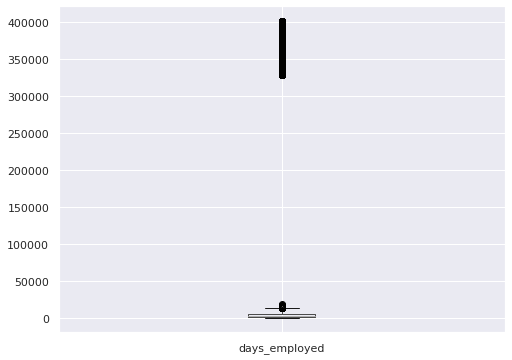

In [441]:
cs_data.boxplot('days_employed')

# Kolom `dob_years` <a id='dob_years_column'></a>

* Kolom dob_years memiliki nilai aneh dimana seorang nasabah mempunyai usia 0. Secara logika, apabila seseorang baru berusia 0 tahun tidak dapat mengajukan pinjaman ke bank.

In [442]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
print(cs_data['dob_years'].value_counts())
print(f"Mean age: {cs_data['dob_years'].mean()}")
print(f"Median age: {cs_data['dob_years'].median()}", end='\n\n')

35    614
41    603
40    603
34    597
38    595
42    592
33    577
39    572
31    556
36    553
44    543
29    543
30    536
48    536
37    531
43    510
50    509
32    506
49    505
28    501
45    494
27    490
52    483
56    482
47    480
54    476
46    469
58    461
57    457
53    457
51    446
55    441
59    441
26    406
60    376
25    356
61    353
62    351
63    268
24    263
64    263
23    252
65    194
66    183
22    183
67    167
21    110
0     100
68     99
69     83
2      76
70     65
71     58
20     51
1      47
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64
Mean age: 43.06202090592335
Median age: 42.0



In [443]:
# Menghitung persentase nilai yang mencurigakan
dob_years_odd = len(cs_data.loc[cs_data['dob_years'] == 0])
percentage_dob_years_null = dob_years_odd / len(cs_data) * 100

round(percentage_dob_years_null, 2)

0.46

* Terdapat 167 entri dengan umur 2 tahun
* Terdapat 47 entri dengan umur 1 tahun
* Terdapat 100 entri dengan umur 0 tahun
* Untuk data umur 1 dan 2, itu harus dihapus seluruhnya. Untuk usia = 0, kita cukup menetapkan usia rata-rata 42 tahun (yang mendekati usia rata-rata 43 tahun).

In [444]:
# Atasi masalah pada kolom `dob_years`, jika terdapat masalah
cs_data = cs_data[cs_data['dob_years']>2]

In [445]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
cs_data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5624.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340267.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


<AxesSubplot:>

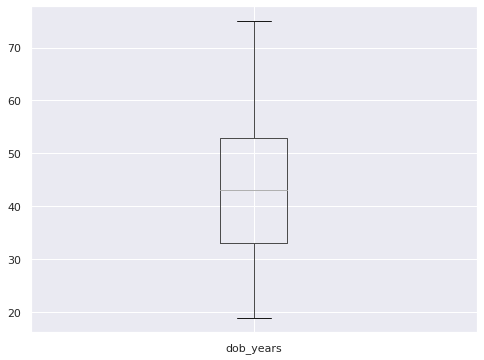

In [446]:
cs_data.boxplot('dob_years')

In [447]:
cs_data[cs_data['dob_years'] <= 2].count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

# Kolom `family_status` <a id='family_status_column'></a>

* Terdapat 5 kategori status keluarga. Satu-satunya masalah yang dapat muncul adalah jika kolom family_status_id tidak cocok dengan deskripsi kategori status.

In [448]:
# Mari kita lihat nilai untuk kolom ini
cs_data.groupby('family_status')['family_status_id'].value_counts()

family_status      family_status_id
civil partnership  1                    4139
divorced           3                    1179
married            0                   12254
unmarried          4                    2783
widow / widower    2                     947
Name: family_status_id, dtype: int64

**Sekilas saya melihat tidak ada masalah atau tidak ada ketidakcocokkan data antara family_status dan family_status_id**

# Kolom `gender` <a id='gender_column'></a>

* Kolom 'gender' tidak memiliki nilai null/kosong, sehingga yang perlu kita lihat adalah apakah terdapat nilai yang tak terduga selain (F & M)

In [449]:
# Mari kita liat nilai dalam kolom ini
cs_data['gender'].value_counts()

F      14083
M       7218
XNA        1
Name: gender, dtype: int64

In [450]:
# Atasi nilai-nilai yang bermasalah, jika ada
cs_data[cs_data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2359.0,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


* Terdapat data 'XNA' yang tidak bisa kita identifikasikan apakah itu Female or Male.
* Dikarenakan data pendukung tidak memungkinkan untuk mengganti nilai XNA dan jumlanya sangat kecil <1% maka akan lebih baik jika di hapus.

In [451]:
# Menghapus XNA dari dataset
i = cs_data[(cs_data['gender'] == 'XNA')].index

cs_data = cs_data.drop(i)

In [452]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
cs_data['gender'].value_counts()

F    14083
M     7218
Name: gender, dtype: int64

# Kolom `income_type` <a id='income_type__column'></a>

* Sekilas saya melihat tidak terdapat keanehan yang signifikan dari kolom 'income_type'

In [453]:
# Mari kita lihat nilai dalam kolom ini
cs_data['income_type'].value_counts()

employee                       10996
business                        5033
retiree                         3819
civil servant                   1447
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

In [454]:
# Melihat apakah ada hubungannya dengan 'unemployed'
cs_data.loc[cs_data['income_type'] == 'unemployed']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3133,1,337525.0,31,secondary education,1,married,0,M,unemployed,1,9593.119,buying property for renting out
14798,0,395303.0,45,bachelor's degree,0,civil partnership,1,F,unemployed,0,32435.602,housing renovation


* Sekilas kita melihat bahwa terdapat 2 entry yang mempunyai 'income_type' unemployed, namun masih terdapat nilai days_employed dan 'total_income'
* Kita bisa berasumsi bahwa orang tersebut kemungkinan bingung apakah harus mengisi ketika masih bekerja atau tidak. Dan asumsi lain ada kemungkinan 2 data ini mengisi data (palsu/bohong) untuk mendapatkan pinjaman
* Karena tidak berpengaruh signifikan, maka kita akan menghapus data itu.

In [455]:
# Menghapus data unemployed
cs_data.drop(cs_data[cs_data['income_type'] == 'unemployed'].index, inplace=True)
cs_data.loc[cs_data['income_type'] == 'unemployed']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [456]:
# Melihat apakah ada hubungannya dengan 'student'
cs_data.loc[cs_data['income_type'] == 'student']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
9410,0,579.0,22,bachelor's degree,0,unmarried,4,M,student,0,15712.26,construction of own property


In [457]:
# Menghapus data student
cs_data.drop(cs_data[cs_data['income_type'] == 'student'].index, inplace=True)
cs_data.loc[cs_data['income_type'] == 'student']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


* Karena kolom 'days_employed', 'total_income', dan 'purpose' sangat spesifik, kemungkinan tidak akan ada banyak baris duplikat. * Mungkin ada beberapa baris duplikat di 'education', meskipun kita sudah mengubahnya ke format lower.

In [458]:
# Periksa duplikat pada setiap kolom
cs_data[cs_data.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 2849 to 21415
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          71 non-null     int64  
 1   days_employed     0 non-null      float64
 2   dob_years         71 non-null     int64  
 3   education         71 non-null     object 
 4   education_id      71 non-null     int64  
 5   family_status     71 non-null     object 
 6   family_status_id  71 non-null     int64  
 7   gender            71 non-null     object 
 8   income_type       71 non-null     object 
 9   debt              71 non-null     int64  
 10  total_income      0 non-null      float64
 11  purpose           71 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.2+ KB


In [459]:
# Memeriksa jumlah duplikat
cs_data.duplicated().sum()

71

In [460]:
# Atasi duplikat, jika ada
cs_data = cs_data.drop_duplicates()

In [461]:
# Lakukan pemeriksaan terakhir untuk mengecek apakah kita memiliki duplikat
cs_data[cs_data.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          0 non-null      int64  
 1   days_employed     0 non-null      float64
 2   dob_years         0 non-null      int64  
 3   education         0 non-null      object 
 4   education_id      0 non-null      int64  
 5   family_status     0 non-null      object 
 6   family_status_id  0 non-null      int64  
 7   gender            0 non-null      object 
 8   income_type       0 non-null      object 
 9   debt              0 non-null      int64  
 10  total_income      0 non-null      float64
 11  purpose           0 non-null      object 
dtypes: float64(2), int64(5), object(5)
memory usage: 0.0+ bytes


In [462]:
# Memastikan apakah duplikat sudah berhasil dihapus
cs_data.duplicated().sum()

0

In [463]:
# Memeriksa ringkasan statistik dari DataFrame
cs_data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21227.000000,19146.000000,21227.000000,21227.000000,21227.000000,21227.000000,19146.000000
mean,0.474019,66988.550977,43.484242,0.817685,0.973100,0.081170,26799.882292
std,0.752220,139098.706414,12.247463,0.549296,1.421153,0.273103,16516.094126
min,0.000000,25.000000,19.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,928.000000,33.000000,1.000000,0.000000,0.000000,16492.658500
50%,0.000000,2198.000000,43.000000,1.000000,0.000000,0.000000,23203.328000
75%,1.000000,5554.750000,53.000000,1.000000,1.000000,0.000000,32544.513250
max,5.000000,401756.000000,75.000000,4.000000,4.000000,1.000000,362496.645000


In [464]:
# Periksa ukuran dataset yang sekarang Anda miliki setelah manipulasi pertama yang Anda lakukan
cs_data.shape

(21227, 12)

* Sebagian besar perubahan yang dilakukan adalah membuat data lebih konsisten dalam pemformatan. 
* Nilai-nilai yang hilang sebagian kecil sudah kita hilangkan. 

# Bekerja dengan nilai yang hilang <a id='null_data'></a>

In [465]:
# Temukan dictionary
# Membuat dictionary children_dict
children_dict = cs_data[['children']]
children_dict = children_dict.drop_duplicates().reset_index(drop=True)

In [466]:
# Membuat dictionary debt_dict
debt_dict = cs_data[['debt']]
debt_dict = debt_dict.drop_duplicates().reset_index(drop=True)

# Memperbaiki nilai yang hilang di `total_income` <a id='null_total_income'></a>

**Hanya ada dua kolom dengan nilai yang hilang: 'days_employed' dan 'total_income'.**

**Pertama, karena usia kemungkinan merupakan prediktor kuat untuk pendapatan total, usia akan dikelompokkan dalam kelompok 10 tahun, dari 0 hingga 70+**

In [467]:
# Mari kita tulis sebuah fungsi untuk menghitung kategori usia
def assign_age_group(age):
    if age < 0 or pd.isna(age):
        return 'NA'
    elif age < 10:
        return '0-9'
    elif age < 20:
        return '10-19'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    elif age < 70:
        return '60-69'
    else:
        return '70+'

In [468]:
# Lakukan pengujian untuk melihat apakah fungsi Anda bekerja atau tidak
cs_data['dob_years'].apply(assign_age_group)

0        40-49
1        30-39
2        30-39
3        30-39
4        50-59
         ...  
21520    40-49
21521    60-69
21522    30-39
21523    30-39
21524    40-49
Name: dob_years, Length: 21227, dtype: object

In [469]:
assign_age_group(12)

'10-19'

In [470]:
# Buatlah kolom baru berdasarkan fungsi
cs_data['age_group'] = cs_data['dob_years'].apply(assign_age_group)

In [471]:
# Periksa bagaimana nilai di dalam kolom baru
cs_data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-39
2,0,5624.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-39
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-39
4,0,340267.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59


In [472]:
# Memeriksa bagaimana nilai di kolom baru
cs_data.groupby('age_group')['dob_years'].value_counts()

age_group  dob_years
10-19      19            14
20-29      29           542
           28           501
           27           490
           26           406
           25           356
           24           262
           23           250
           22           182
           21           110
           20            51
30-39      35           613
           34           595
           38           594
           33           577
           39           571
           31           554
           36           552
           30           533
           37           530
           32           505
40-49      40           601
           41           601
           42           591
           44           541
           48           534
           43           509
           49           505
           45           492
           47           477
           46           466
50-59      50           508
           52           483
           56           478
           54           473

* Untuk menentukan pendapatan, kita bisa mencari data berdasarkan status 'education' dan 'age_group' karena itu akan menjadi prediktor pendapatan yang paling logis. 
* Umumnya, ketika membuat keputusan tentang status 'income', akan lebih baik jika diukur berdasarkan median. Alasannya sederhana, karena ada orang yang menghasilkan lebih banyak atau lebih sedikit uang daripada yang lain.

<AxesSubplot:>

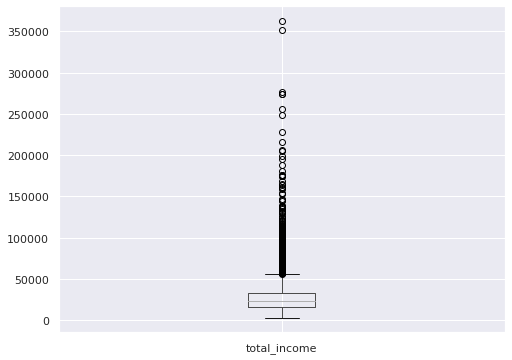

In [473]:
cs_data.boxplot('total_income')

In [474]:
total_income_clean = cs_data.loc[~cs_data['total_income'].isna()]
total_income_clean.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-39
2,0,5624.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-39
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-39
4,0,340267.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59


In [475]:
# Buat tabel tanpa nilai yang hilang dan tampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
income_type_pivot = pd.pivot_table(total_income_clean,
                       index=['income_type'],
                       values=['total_income'],
                       aggfunc=['median', 'mean'])
round(income_type_pivot, 2)

,median,mean
,total_income,total_income
income_type,,
business,27594.64,32424.42
civil servant,24076.12,27336.44
employee,22815.10,25822.87
entrepreneur,79866.10,79866.10
paternity / maternity leave,8612.66,8612.66
retiree,18959.63,21950.72


In [476]:
# Membuat fungsi
def fill_missing_value (cs_data, income_type, total_income):
    grouped_values = cs_data.groupby('income_type')['total_income'].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values['income_type'][i]
        value = grouped_values['total_income'][i]
        cs_data.loc[(cs_data['income_type']==group) & (cs_data['total_income'].isna()), 'total_income'] = value
    return cs_data


cs_data = fill_missing_value(cs_data, 'income_type', 'total_income')
cs_data['total_income'].isna().sum()

0

# Memperbaiki nilai di `days_employed` <a id='null_days_employed'></a>

In [477]:
days_employed_clean = cs_data.loc[~cs_data['days_employed'].isna()]
days_employed_clean.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-39
2,0,5624.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-39
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-39
4,0,340267.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59


<AxesSubplot:>

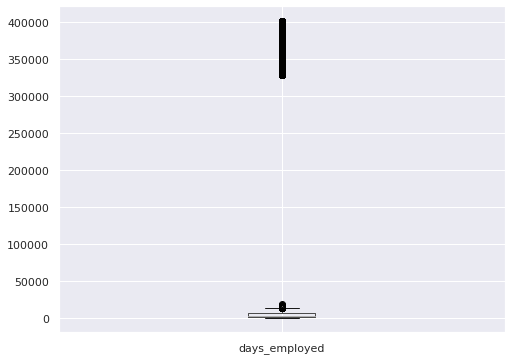

In [478]:
cs_data.boxplot('days_employed')

In [479]:
# Membuat pivot table
days_age_group_pivot = pd.pivot_table(days_employed_clean,
                       index=['age_group'],
                       values=['total_income'],
                       aggfunc=['median', 'mean'])
round(days_age_group_pivot, 2)

,median,mean
,total_income,total_income
age_group,,
10-19,14934.90,16993.94
20-29,22807.04,25586.59
30-39,24706.71,28318.21
40-49,24771.63,28574.62
50-59,22195.85,25807.71
60-69,19811.33,23236.99
70+,18751.32,20125.66


In [480]:
# Membuat fungsi
def fill_missing_value (cs_data, age_group, days_employed):
    grouped_values = cs_data.groupby('age_group')['days_employed'].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values['age_group'][i]
        value = grouped_values['days_employed'][i]
        cs_data.loc[(cs_data['age_group']==group) & (cs_data['days_employed'].isna()), 'days_employed'] = value
    return cs_data

#apply the function
cs_data= fill_missing_value(cs_data, 'age_group', 'days_employed')

#check the dataset
cs_data['days_employed'].isna().sum()

0

In [481]:
# Mengecek nilai null
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21227 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21227 non-null  int64  
 1   days_employed     21227 non-null  float64
 2   dob_years         21227 non-null  int64  
 3   education         21227 non-null  object 
 4   education_id      21227 non-null  int64  
 5   family_status     21227 non-null  object 
 6   family_status_id  21227 non-null  int64  
 7   gender            21227 non-null  object 
 8   income_type       21227 non-null  object 
 9   debt              21227 non-null  int64  
 10  total_income      21227 non-null  float64
 11  purpose           21227 non-null  object 
 12  age_group         21227 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


# Pengkategorian Data <a id='category_data'></a>

* Penggantian Jenis Data 

In [482]:
try: 
    cs_data['days_employed'] = cs_data['days_employed'].astype('int')
    cs_data['total_income'] = cs_data['total_income'].astype('int')
except: 
    print('Data conversion failed ((')
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21227 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21227 non-null  int64 
 1   days_employed     21227 non-null  int64 
 2   dob_years         21227 non-null  int64 
 3   education         21227 non-null  object
 4   education_id      21227 non-null  int64 
 5   family_status     21227 non-null  object
 6   family_status_id  21227 non-null  int64 
 7   gender            21227 non-null  object
 8   income_type       21227 non-null  object
 9   debt              21227 non-null  int64 
 10  total_income      21227 non-null  int64 
 11  purpose           21227 non-null  object
 12  age_group         21227 non-null  object
dtypes: int64(7), object(6)
memory usage: 2.3+ MB


In [483]:
# Menggabungkan 'entrepreneur' to 'business'
cs_data['income_type'] = cs_data['income_type'].replace('entrepreneur', 'business')

# Kategorisasi Kolom `children` <a id='category_children'></a>

In [484]:
# Categorizing children
def children_fx(row):
    child = row['children']
    
    if child == 0:
        return 'no children'
    if child == 1:
        return '1 child'
    else:
        return '2 or more children'
    

cs_data['child_groups'] = cs_data.apply(children_fx, axis=1)
cs_data['child_groups'].value_counts()

no children           14019
1 child                4791
2 or more children     2417
Name: child_groups, dtype: int64

In [485]:
# Membuat fungsi
def is_children(children):
    if children == 0 :
        return 'No children'
    return 'Have children'


children_dict['is_children'] = children_dict['children'].apply(is_children)
children_dict['is_children'].value_counts()
children_dict

,children,is_children
0,1,Have children
1,0,No children
2,3,Have children
3,2,Have children
4,4,Have children
5,5,Have children


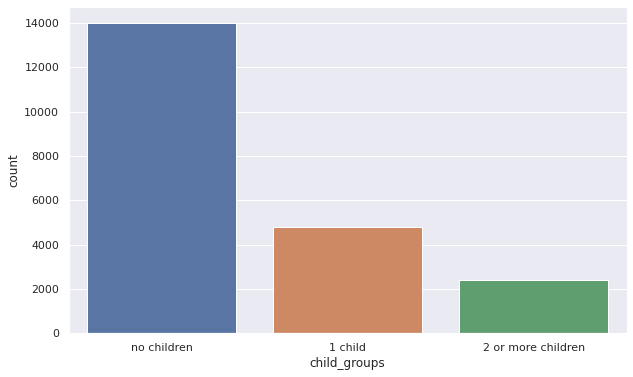

In [486]:
plt.figure(figsize=(10,6))
sns.countplot(x='child_groups', data=cs_data, order= cs_data['child_groups'].value_counts().index)
plt.show()

# Kategorisasi Kolom `education` <a id='category_education'></a>

In [487]:
# Categorizing education
cs_data[cs_data['education_id']==0]['education'].unique()

array(["bachelor's degree"], dtype=object)

In [488]:
# Loop all education_id untuk memeriksa apakah education adalah semua nilai unik dari education_id
for i in range(len(cs_data['education_id'].value_counts())):
    education_category = cs_data[cs_data['education_id']==i]['education'].unique()
    print(f"education_id = {i} is {education_category[0]} education")

education_id = 0 is bachelor's degree education
education_id = 1 is secondary education education
education_id = 2 is some college education
education_id = 3 is primary education education
education_id = 4 is graduate degree education


In [489]:
# Cara lain untuk mengonfirmasi apakah semua baris yang memiliki education_id sama dengan nol adalah semua gelar sarjana
all((cs_data['education_id']==0)==(cs_data['education']=="bachelor's degree"))

True

In [490]:
# Melihat hubungannya
cs_data.groupby('education_id')['education'].value_counts()

education_id  education          
0             bachelor's degree       5190
1             secondary education    15011
2             some college             738
3             primary education        282
4             graduate degree            6
Name: education, dtype: int64

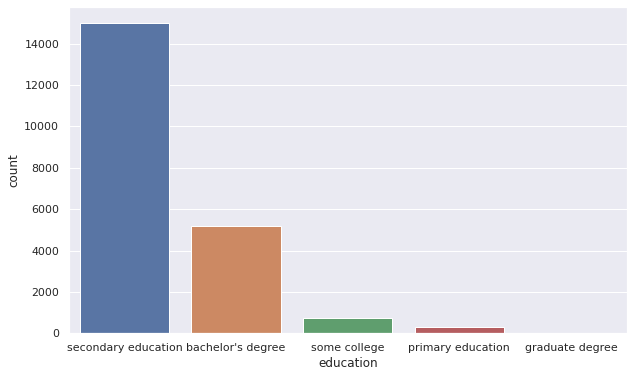

In [491]:
plt.figure(figsize=(10,6))
sns.countplot(x='education', data=cs_data, order= cs_data['education'].value_counts().index)
plt.show()

# Kategorisasi Kolom `family_status` <a id='category_family_status'></a>

In [492]:
# Categorizing family_status
cs_data['family_status'].value_counts()

married              12212
civil partnership     4111
unmarried             2779
divorced              1179
widow / widower        946
Name: family_status, dtype: int64

In [493]:
cs_data['family_status_id'].value_counts()

0    12212
1     4111
4     2779
3     1179
2      946
Name: family_status_id, dtype: int64

In [494]:
# Melihat apakah family_status_id = 0 semuanya sudah menikah sebagai satu-satunya nilai unik
cs_data[cs_data['family_status_id']==0]['family_status'].unique()

array(['married'], dtype=object)

In [495]:
# Loop all family_status_id untuk memeriksa apakah family_status_id = 0 married dalam family_status, dll
for i in range(len(cs_data['family_status_id'].value_counts())):
    family_category = cs_data[cs_data['family_status_id']==i]['family_status'].unique()
    print(f"family_status_id = {i} is {family_category[0]} family_status")

family_status_id = 0 is married family_status
family_status_id = 1 is civil partnership family_status
family_status_id = 2 is widow / widower family_status
family_status_id = 3 is divorced family_status
family_status_id = 4 is unmarried family_status


In [496]:
# Cara lain untuk mengonfirmasi apakah semua baris yang memiliki family_status_id sama dengan nol family_status = married
all((cs_data['family_status_id']==0)==(cs_data['family_status']=='married'))

True

In [497]:
# Melihat hubungannya
cs_data.groupby('family_status_id')['family_status'].value_counts()

family_status_id  family_status    
0                 married              12212
1                 civil partnership     4111
2                 widow / widower        946
3                 divorced              1179
4                 unmarried             2779
Name: family_status, dtype: int64

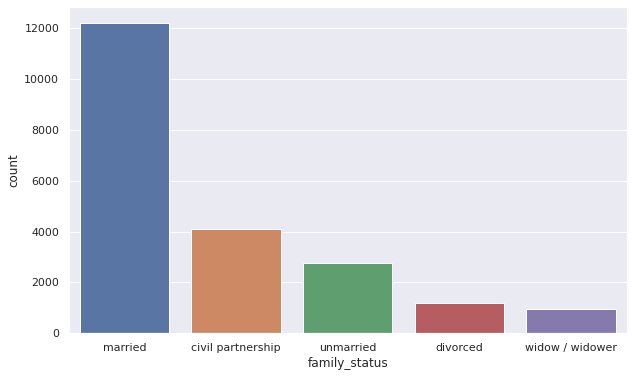

In [498]:
plt.figure(figsize=(10,6))
sns.countplot(x='family_status', data=cs_data, order= cs_data['family_status'].value_counts().index)
plt.show()

# Kategorisasi Kolom `purpose` <a id='category_purpose'></a>

In [499]:
# Categorizing purpose
cs_data['purpose'].value_counts().count() # there are 38 different types of purpose
english_stemmer = SnowballStemmer('english')

def type_of_purpose(purpose):
    for word in purpose.split(' '):
        if 'car' == english_stemmer.stem(word):
           return 'buying a car'
        if 'wed' == english_stemmer.stem(word):      
           return 'wedding ceremony'
        if ('educ' == english_stemmer.stem(word) or 'univers' == english_stemmer.stem(word)):   
           return 'going to university'
        if ('hous' == english_stemmer.stem(word) or 'properti' == english_stemmer.stem(word) or 'estat' == english_stemmer.stem(word)):
           return 'real estate transactions'
    
    return purpose

cs_data['purpose'] = cs_data['purpose'].apply(type_of_purpose)
cs_data['purpose'].value_counts()

real estate transactions    10700
buying a car                 4258
going to university          3970
wedding ceremony             2299
Name: purpose, dtype: int64

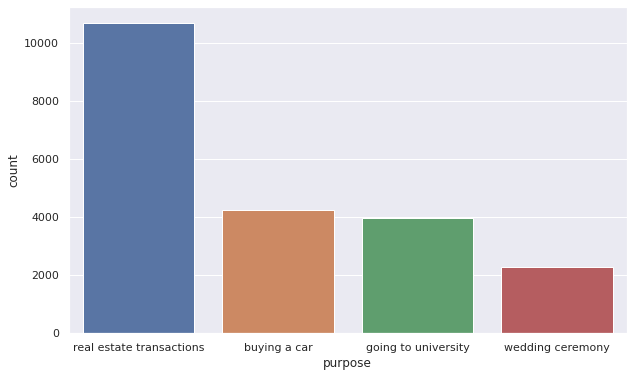

In [500]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', data=cs_data, order= cs_data['purpose'].value_counts().index)
plt.show()

# Kategorisasi Kolom `total_income` <a id='category_total_income'></a>

In [501]:
# Categorizing total_income
def group_income (total_income):
    if total_income <15000 :
        return 'Low'
    if total_income <20000 :
        return 'Middle'
    if total_income <25000 :
        return 'Upper Middle'
    if total_income <30000 :
        return 'High'
    if total_income <40000 :
        return 'Upper High'
    return 'Very High'

# Menambahkan bidang 'group_income'
cs_data['group_income'] = cs_data['total_income'].apply(group_income)

# Membuat dictionary total_income_dict
total_income_dict = cs_data[['group_income']]
total_income_dict = total_income_dict.drop_duplicates().reset_index(drop=True)
def name_group_income (group_income):
    if group_income == 'Low' :
        return '< 15000'
    if group_income == 'Middle' :
        return '15000 - 20000'
    if group_income == 'Upper Middle' :
        return '20000 - 25000'
    if group_income == 'High' :
        return '25000 - 30000'
    if group_income == 'Very High' :
        return '30000 - 40000'
    return '> 40000'

# Menambahkan 'group_income'
total_income_dict['name_group_income'] = total_income_dict['group_income'].apply(name_group_income)
total_income_dict.sort_values(by='group_income', ascending = True)

,group_income,name_group_income
3,High,25000 - 30000
5,Low,< 15000
1,Middle,15000 - 20000
4,Upper High,> 40000
2,Upper Middle,20000 - 25000
0,Very High,30000 - 40000


In [502]:
cs_data['group_income'] = cs_data['total_income'].apply(group_income)
cs_data['group_income'].value_counts()

Upper Middle    4543
Middle          3969
Low             3705
High            3151
Upper High      3075
Very High       2784
Name: group_income, dtype: int64

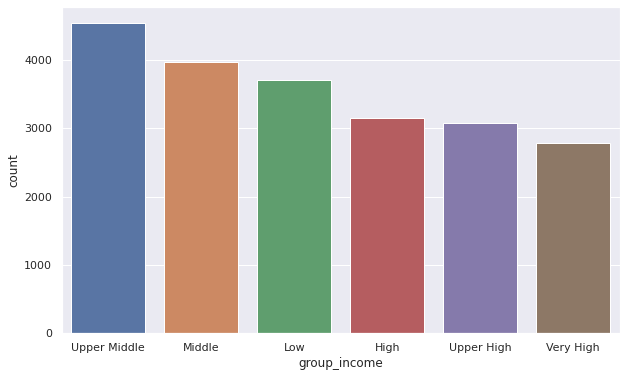

In [503]:
plt.figure(figsize=(10,6))
sns.countplot(x='group_income', data=cs_data, order=cs_data['group_income'].value_counts().index)
plt.show()

# Kategorisasi Kolom `age` <a id='category_age'></a>

In [504]:
# Categorizing age
def age_category(age):
    if age <= 35:
        return 'Young'
    elif age <= 55:
        return 'Middle'
    elif age <= 65:
        return 'Upper Middle'
    else:
        return 'Senior'

cs_data['age_category'] = cs_data['dob_years'].apply(age_category)

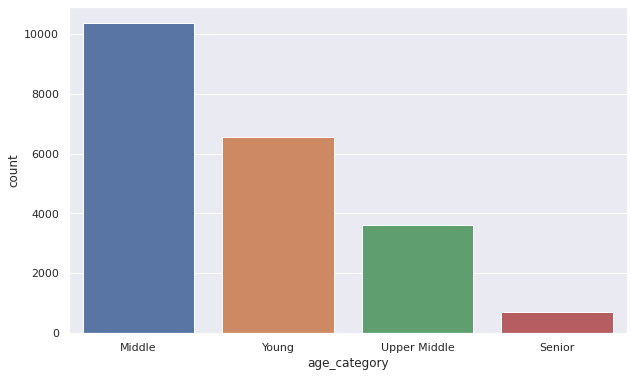

In [505]:
plt.figure(figsize=(10,6))
sns.countplot(x='age_category', data=cs_data, order= cs_data['age_category'].value_counts().index)
plt.show()

# Kategorisasi Kolom `debt` <a id='category_debt'></a>

In [506]:
# Categorizing debt
def is_debt(debt):
    if debt == 0 :
        return 'no debt'
    return 'there is a debt'

# Menambah bidang 'is_debt'
debt_dict['is_debt'] = debt_dict['debt'].apply(is_debt)
debt_dict['is_debt'].value_counts()
debt_dict

,debt,is_debt
0,0,no debt
1,1,there is a debt


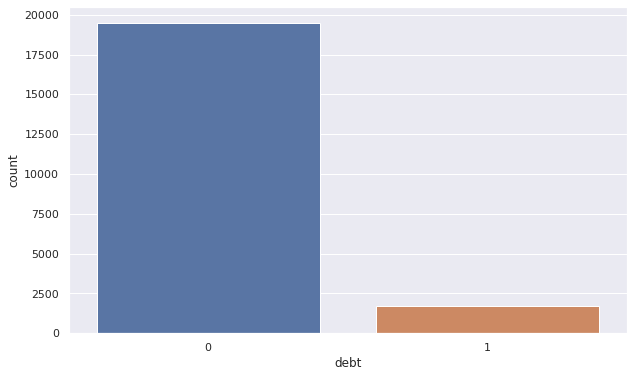

In [507]:
plt.figure(figsize=(10,6))
sns.countplot(x='debt', data=cs_data, order= cs_data['debt'].value_counts().index)
plt.show()

In [508]:
cs_data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,child_groups,group_income,age_category
0,1,8438,42,bachelor's degree,0,married,0,F,employee,0,40620,real estate transactions,40-49,1 child,Very High,Middle
1,1,4025,36,secondary education,1,married,0,F,employee,0,17932,buying a car,30-39,1 child,Middle,Middle
2,0,5624,33,secondary education,1,married,0,M,employee,0,23341,real estate transactions,30-39,no children,Upper Middle,Young
3,3,4125,32,secondary education,1,married,0,M,employee,0,42820,going to university,30-39,2 or more children,Very High,Young
4,0,340267,53,secondary education,1,civil partnership,1,F,retiree,0,25378,wedding ceremony,50-59,no children,High,Middle
5,0,927,27,bachelor's degree,0,civil partnership,1,M,business,0,40922,real estate transactions,20-29,no children,Very High,Young
6,0,2880,43,bachelor's degree,0,married,0,F,business,0,38484,real estate transactions,40-49,no children,Upper High,Middle
7,0,153,50,secondary education,1,married,0,M,employee,0,21731,going to university,50-59,no children,Upper Middle,Middle
8,2,6930,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337,wedding ceremony,30-39,2 or more children,Middle,Young
9,0,2189,41,secondary education,1,married,0,M,employee,0,23108,real estate transactions,40-49,no children,Upper Middle,Middle


# Memeriksa hipotesis <a id='check_hypothesis'></a>


**Apakah terdapat korelasi antara memiliki anak dengan probabilitas melakukan gagal bayar pinjaman?** <a id='children_number'></a>

Mari kita lakukan analisis data Eksplorasi awal untuk melihat apakah kita dapat memvisualisasikan hubungan antara memiliki anak dan membayar kembali pinjaman tepat waktu. Kita mulai dengan memplot matriks korelasi.

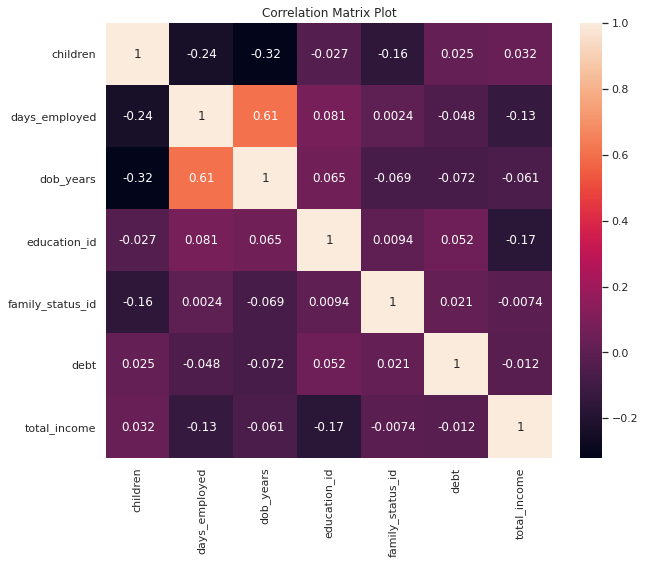

In [509]:
# Membuat matriks korelasi
figsize(10, 8)
corrMatrix = cs_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix Plot')
plt.show()

Text(0.5, 1.0, 'Korelasi antara memiliki anak dan pembayaran pinjaman tepat waktu')

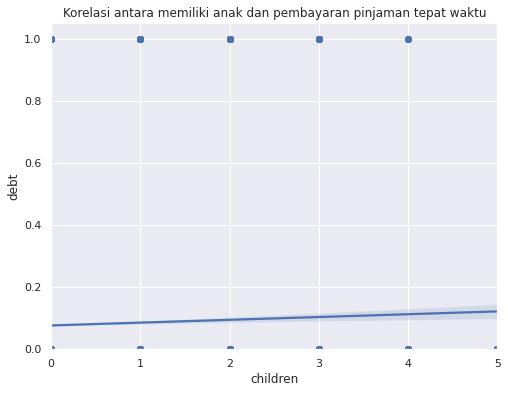

In [510]:
# Memiliki anak sebagai prediktor potensial untuk membayar kembali pinjaman tepat waktu
figsize(8, 6)
sns.regplot(x='children', y='debt', data=cs_data)
plt.ylim(0,)
plt.title('Korelasi antara memiliki anak dan pembayaran pinjaman tepat waktu')

Pertama kita mulai menganalisis data dengan membuat matriks korelasi. Matriks korelasi menunjukkan bahwa hubungan linier tidak terlalu kuat (~0,021) di seluruh kumpulan data. Tentu saja, kita perlu memahami bahwa korelasi tidak menyiratkan sebab akibat sehingga kita perlu mencari cara lain untuk mengekstrak informasi dari data tersebut. Salah satu caranya adalah dengan menggunakan tabel pivot dan memplot karakteristik tabel.

In [511]:
# Menjalankan pivot table
loan_table = pd.pivot_table(cs_data, index = ['children', 'family_status'],
                            values = 'debt',
                            aggfunc = ['sum', len, 'mean']
                           )
loan_table

sum   len      mean
                           debt  debt      debt
children family_status                         
0        civil partnership  227  2715  0.083610
         divorced            55   777  0.070785
         married            514  7437  0.069114
         unmarried          210  2248  0.093416
         widow / widower     52   842  0.061758
1        civil partnership  118   989  0.119312
         divorced            21   311  0.067524
         married            243  2967  0.081901
         unmarried           51   447  0.114094
         widow / widower      7    77  0.090909
2        civil partnership   30   341  0.087977
         divorced             7    79  0.088608
         married            145  1525  0.095082
         unmarried            9    74  0.121622
         widow / widower      3    20  0.150000
3        civil partnership    8    56  0.142857
         divorced             1    11  0.090909
         married             17   247  0.068826
         unmarried            1     8  0.125000
         widow / widower      0     6  0.000000
4        civil partnership    0     8  0.000000
         divorced             0     1  0.000000
         married              3    29  0.103448
         unmarried            1     2  0.500000
         widow / widower      0     1  0.000000
5        civil partnership    0     2  0.000000
         married              0     7  0.000000

Text(0.5, 1.0, 'debt vs number of children')

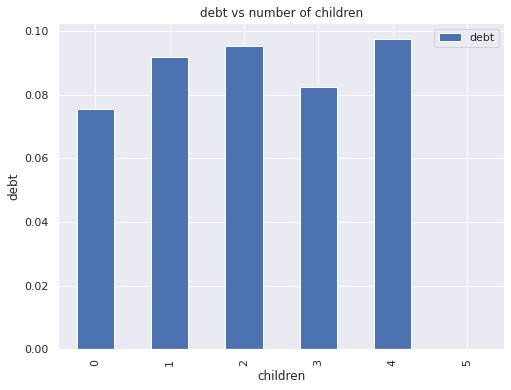

In [512]:
# Memplot debt vs number of children
sns.set()
pd.pivot_table(cs_data, index = 'children', values = 'debt').plot(kind= 'bar')
plt.ylabel('debt')
plt.title('debt vs number of children')

Secara keseluruhan, kita dapat melihat bahwa orang dengan lebih banyak anak cenderung memiliki lebih banyak hutang. Ini adalah angka yang masuk akal ketika kita mempertimbangkan fakta bahwa memiliki lebih banyak anak berarti memiliki lebih banyak tanggung jawab. Kita bisa terus membedah data untuk menambah wawasan dengan melihat debt vs number of children dengan pertimbangan family_status.

Text(0.5, 1.0, 'debt vs number of children with family status consideration')

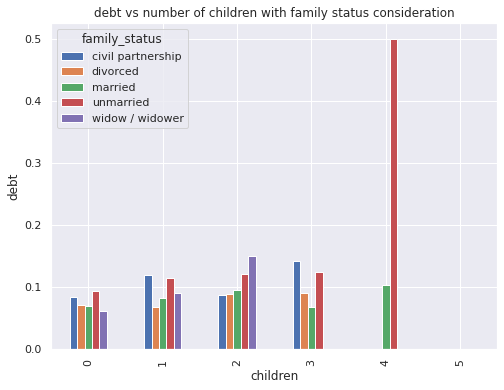

In [513]:
# Memplot debt vs number of children with family status consideration
sns.set()
pd.pivot_table(cs_data, index = 'children', columns= 'family_status', values = 'debt').plot(kind= 'bar')
plt.ylabel('debt')
plt.title('debt vs number of children with family status consideration')

In [514]:
# Periksa data anak dan data gagal bayar pinjaman
children_debt = cs_data[['children','debt','purpose']]
children_debt = children_dict.merge(children_debt, on='children', how='right')
children_debt = debt_dict.merge(children_debt, on='debt', how='right')


# Hitung persentase gagal bayar berdasarkan jumlah anak
# Membuat pivot table
cd_pivot = children_debt.pivot_table(index='is_children', columns='is_debt', values='purpose', aggfunc='count')
cd_pivot['ratio'] = cd_pivot.loc[:,'there is a debt']/( cd_pivot.loc[:,'no debt'] + cd_pivot.loc[:,'there is a debt'])
cd_pivot

is_debt,no debt,there is a debt,ratio
is_children,,,
Have children,6543,665,0.092259
No children,12961,1058,0.075469


**Kesimpulan**

* Jika seseorang memiliki anak, kemungkinan besar pinjaman tidak akan dilunasi tepat waktu.
* Orang-orang tanpa anak memiliki lebih sedikit masalah dalam membayar kembali pinjaman tepat waktu.
* Dari plot di atas, kita dapat mengamati bahwa orang yang dengan lebih dari 4 anak pada umumnya cenderung lebih banyak berhutang daripada orang dengan anak lebih sedikit.

**Apakah terdapat korelasi antara status keluarga dengan probabilitas melakukan gagal bayar pinjaman?** <a id='family_status'></a>

Kita mulai dengan melihat matriks korelasi. Saya melihat korelasi yang lemah antara family_status dan membayar kembali pinjaman tepat waktu di seluruh data. Kita dapat mengiris data dengan menggunakan tabel pivot untuk menghasilkan lebih banyak informasi.

In [515]:
# Membuat copy dataframe untuk keperluan encoding
cs_data_encode = cs_data.copy()

In [516]:
# Encoding kolom 'family_status' 
labels = cs_data_encode['family_status'].astype('category').cat.categories.tolist()
family_status_encode = {'family_status' : {k: v for k,v in zip(labels, list(range(1, len(labels)+1)))}}

print(family_status_encode)
cs_data_encode.replace(family_status_encode, inplace =True)

{'family_status': {'civil partnership': 1, 'divorced': 2, 'married': 3, 'unmarried': 4, 'widow / widower': 5}}


Text(0.5, 1.0, 'Korelasi antara family_status dan tepat waktu pembayaran pinjaman')

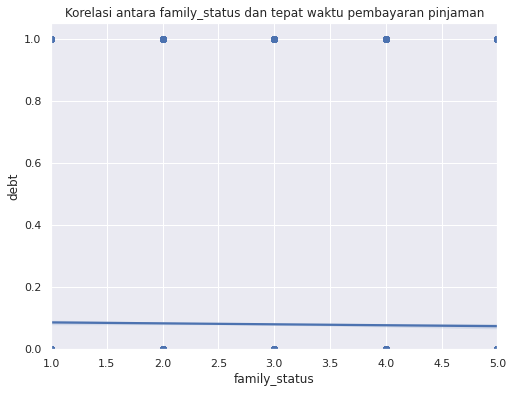

In [517]:
# family_status sebagai prediktor potensial untuk membayar kembali pinjaman tepat waktu
figsize(8, 6)
sns.regplot(x='family_status', y='debt', data=cs_data_encode)
plt.ylim(0,)
plt.title('Korelasi antara family_status dan tepat waktu pembayaran pinjaman')

In [518]:
# Menjalankan pivot table
pd.pivot_table(cs_data, index = ['family_status'],
                            values = 'debt',
                            aggfunc = ['sum', len, 'mean']
                           )

,sum,len,mean
,debt,debt,debt
family_status,,,
civil partnership,383,4111,0.093165
divorced,84,1179,0.071247
married,922,12212,0.075500
unmarried,272,2779,0.097877
widow / widower,62,946,0.065539


Text(0.5, 1.0, 'debt vs family status')

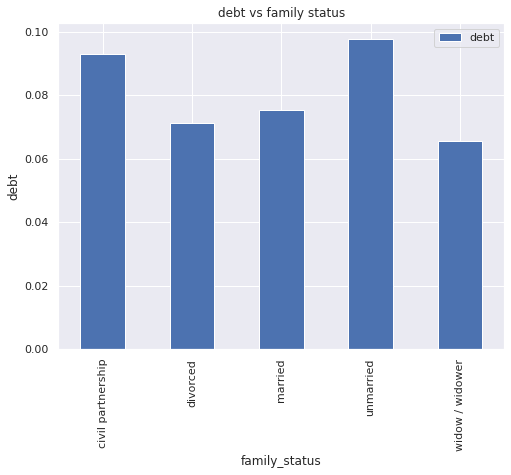

In [519]:
# Memplot family_status vs debt
sns.set()
pd.pivot_table(cs_data, index = 'family_status', values = 'debt').plot(kind= 'bar')
plt.ylabel('debt')
plt.title('debt vs family status')

* Dari plot di atas, orang yang belum menikah memiliki kemungkinan lebih untuk berhutang daripada orang yang sudah menikah. 
* Janda / duda paling kecil kemungkinannya untuk berhutang dibandingkan kelompok lain mana pun.

In [520]:
# Pivot table untuk family_status, debt and education
loan_table1 = pd.pivot_table(cs_data, 
                             index = ['family_status', 'education'], 
                             values= 'debt', 
                             aggfunc = [len, 'mean']
                            )
loan_table1

len      mean
                                       debt      debt
family_status     education                          
civil partnership bachelor's degree     944  0.058263
                  primary education      56  0.196429
                  secondary education  2949  0.102747
                  some college          162  0.086420
divorced          bachelor's degree     310  0.048387
                  graduate degree         1  0.000000
                  primary education      20  0.100000
                  secondary education   817  0.077111
                  some college           31  0.129032
married           bachelor's degree    3011  0.051478
                  graduate degree         4  0.000000
                  primary education     141  0.106383
                  secondary education  8716  0.082836
                  some college          340  0.088235
unmarried         bachelor's degree     792  0.058081
                  graduate degree         1  0.000000
                  primary education      34  0.088235
                  secondary education  1760  0.116477
                  some college          192  0.093750
widow / widower   bachelor's degree     133  0.045113
                  primary education      31  0.000000
                  secondary education   769  0.070221
                  some college           13  0.153846

Text(0.5, 1.0, 'debt vs family status with education level consideration')

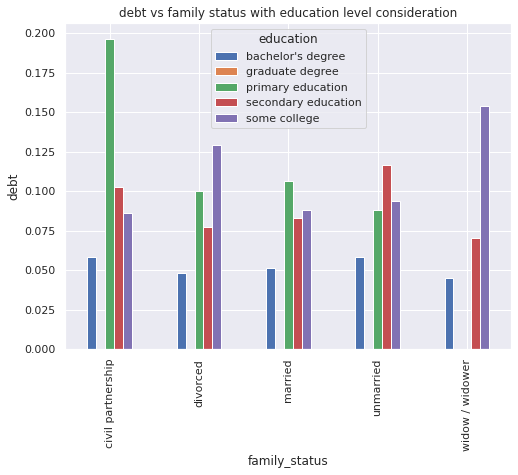

In [521]:
# Memplot debt vs family_status with education level consideration
sns.set()
pd.pivot_table(cs_data, index = 'family_status', columns= 'education', values = 'debt').plot(kind= 'bar')

plt.ylabel('debt')
plt.title('debt vs family status with education level consideration')

* Kita dapat melihat bahwa ketika kita mempertimbangkan status keluarga di seluruh tingkat pendidikan, data memberi tahu kita bahwa orang dengan gelar sarjana lebih kecil kemungkinannya untuk berhutang dibandingkan kelompok lain mana pun. 
* Janda/duda dengan beberapa gelar sarjana lebih cenderung berhutang daripada tingkat status keluarga lainnya dengan tingkat gelar yang sama. 
* civil partnership dengan primary education lebih cenderung berhutang daripada tingkat status keluarga lainnya dengan tingkat gelar yang sama.

In [522]:
# Periksa data status keluarga dan data gagal bayar pinjaman
marital_debt = cs_data[['family_status','debt','purpose']]
marital_debt = debt_dict.merge(marital_debt, on='debt', how='right')


# Hitung persentase gagal bayar berdasarkan status keluarga
md_pivot = marital_debt.pivot_table(index='family_status', columns='is_debt', values='purpose', aggfunc='count')
md_pivot['ratio'] = md_pivot.loc[:,'there is a debt']/( md_pivot.loc[:,'no debt'] + md_pivot.loc[:,'there is a debt'])
md_pivot.sort_values(by='ratio', ascending = True)


is_debt,no debt,there is a debt,ratio
family_status,,,
widow / widower,884,62,0.065539
divorced,1095,84,0.071247
married,11290,922,0.075500
civil partnership,3728,383,0.093165
unmarried,2507,272,0.097877


**Kesimpulan**

* Setelah menganalisis data yang diperoleh, kita dapat mengatakan bahwa 'janda / duda' dan 'bercerai' memiliki lebih sedikit tunggakan pinjaman, dan kelompok 'belum menikah' memiliki indikator terburuk dalam pengembalian pinjaman tepat waktu. 
* Orang yang belum menikah memiliki kemungkinan lebih sedikit untuk berhutang daripada orang yang sudah menikah. 
* Janda / duda paling kecil kemungkinannya untuk berhutang dibandingkan kelompok lain mana pun.

**Apakah terdapat korelasi antara tingkat pendapatan dengan probabilitas melakukan gagal bayar pinjaman?** <a id='total_income'></a>

Text(0.5, 1.0, 'Korelasi antara total_income dan pembayaran pinjaman tepat waktu')

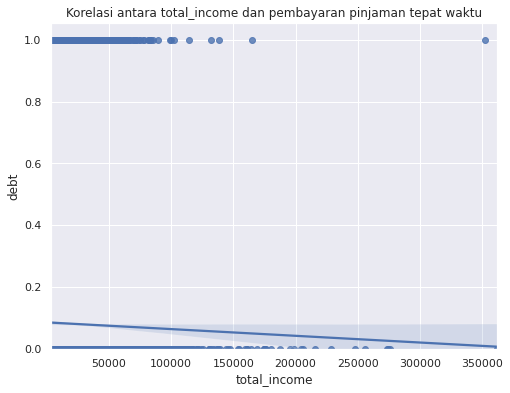

In [523]:
# total_income sebagai prediktor potensial untuk membayar kembali pinjaman tepat waktu
figsize(8, 6)
sns.regplot(x='total_income', y='debt', data=cs_data_encode)
plt.ylim(0,)
plt.title('Korelasi antara total_income dan pembayaran pinjaman tepat waktu')

In [524]:
# Menjalankan pivot table
pd.pivot_table(cs_data, index = ['total_income'])

,children,days_employed,debt,dob_years,education_id,family_status_id
total_income,,,,,,
3306,0.0,359220.0,1.0,57.0,1.0,0.0
3392,0.0,369709.0,0.0,37.0,1.0,1.0
3418,1.0,3643.0,0.0,52.0,1.0,0.0
3471,0.0,359727.0,0.0,68.0,1.0,1.0
3503,0.0,346603.0,0.0,61.0,1.0,0.0
...,...,...,...,...,...,...
273809,0.0,5735.0,0.0,42.0,0.0,1.0
274402,0.0,4720.0,0.0,61.0,1.0,4.0
276204,1.0,5249.0,0.0,35.0,1.0,1.0


Text(0.5, 1.0, 'total income vs debt')

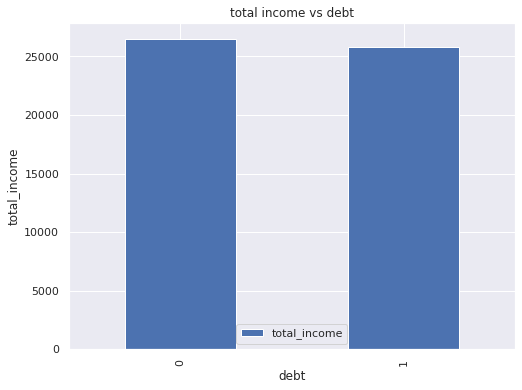

In [525]:
# Memplot total_income vs debt
sns.set()
pd.pivot_table(cs_data, index = 'debt', values = 'total_income').plot(kind= 'bar')
plt.ylabel('total_income')
plt.title('total income vs debt')

In [526]:
# Pivot table total_income vs debt
loan_table2 = pd.pivot_table(cs_data, 
                             index = 'total_income', 
                             values= 'debt', 
                             aggfunc = ['mean', min, max]
                            )
loan_table2

,mean,min,max
,debt,debt,debt
total_income,,,
3306,1.0,1,1
3392,0.0,0,0
3418,0.0,0,0
3471,0.0,0,0
3503,0.0,0,0
...,...,...,...
273809,0.0,0,0
274402,0.0,0,0


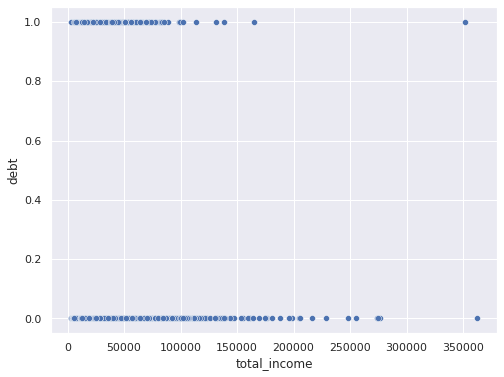

In [527]:
# Menjalankan scatter plot 
ax = sns.scatterplot(x='total_income', y='debt', data=cs_data )

In [528]:
# Periksa data tingkat pendapatan dan data gagal bayar pinjaman
total_income_debt = cs_data[['group_income','debt','purpose']]
total_income_debt = total_income_dict.merge(total_income_debt, on='group_income', how='right')
total_income_debt = debt_dict.merge(total_income_debt, on='debt', how='right')
total_income_debt



# Hitung persentase gagal bayar berdasarkan tingkat pendapatan
tid_pivot = total_income_debt.pivot_table(index='name_group_income', columns='is_debt', values='purpose', aggfunc='count')
tid_pivot['ratio'] = tid_pivot.loc[:,'there is a debt']/( tid_pivot.loc[:,'no debt'] + tid_pivot.loc[:,'there is a debt'])
tid_pivot.sort_values(by='ratio', ascending = True)

is_debt,no debt,there is a debt,ratio
name_group_income,,,
30000 - 40000,2591,193,0.069325
> 40000,2835,240,0.078049
< 15000,3409,296,0.079892
25000 - 30000,2886,265,0.084100
20000 - 25000,4156,387,0.085186
15000 - 20000,3627,342,0.086168


**Kesimpulan**

* Dari matriks korelasi, kita memiliki korelasi negatif yang lemah antara total_income dan debt. Melihat lebih jauh pada tabel pivot, kita tidak dapat memperoleh hubungan apa pun antara total_income dan debt.
* Dengan menganalisis hasil pivot table terakhir, kita melihat bahwa peminjam terbaik adalah klien dengan pendapatan 30.000 - 40.000, dan peminjam yang paling tidak dapat diandalkan adalah klien dengan pendapatan 15.000 - 20.000 atau 20.000 - 25.000.

**Bagaimana tujuan kredit memengaruhi persentase gagal bayar?** <a id='purpose'></a>

In [529]:
# Encoding kolom 'purpose' 
labels = cs_data_encode['purpose'].astype('category').cat.categories.tolist()
purpose_encode = {'purpose' : {k: v for k,v in zip(labels, list(range(1, len(labels)+1)))}}

print(purpose_encode)
cs_data_encode.replace(purpose_encode, inplace =True)

{'purpose': {'buying a car': 1, 'going to university': 2, 'real estate transactions': 3, 'wedding ceremony': 4}}


Text(0.5, 1.0, 'Hubungan antara tujuan pinjaman dan ketepatan waktu pengembalian pinjaman')

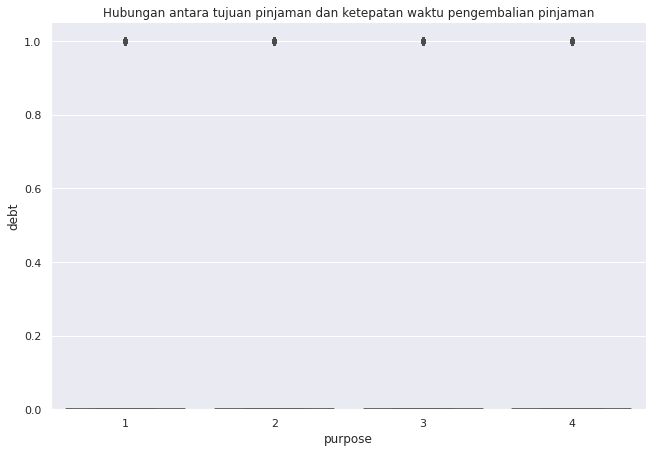

In [530]:
# Tujuan pinjaman yang berbeda sebagai prediktor potensial untuk membayar kembali pinjaman tepat waktu
sns.catplot(x='purpose', y='debt', kind='box', data=cs_data_encode, height=6, aspect=1.5)
plt.ylim(0,)
plt.title('Hubungan antara tujuan pinjaman dan ketepatan waktu pengembalian pinjaman')

In [531]:
# Menjalankan pivot table
pd.pivot_table(cs_data, index = ['purpose'])

,children,days_employed,debt,dob_years,education_id,family_status_id,total_income
purpose,,,,,,,
buying a car,0.465477,67104.723344,0.093236,43.718178,0.820808,0.990136,26438.994364
going to university,0.480353,65382.584131,0.092947,43.612343,0.829723,0.954408,26022.466499
real estate transactions,0.476729,63234.266355,0.072523,43.363271,0.815888,0.967477,26684.121963
wedding ceremony,0.466290,66061.613310,0.078730,43.392779,0.799478,1.000000,26233.782514


In [532]:
# Pivot table with purpose vs debt
loan_table3 = pd.pivot_table(cs_data, 
                             index = ['purpose'], 
                             values= 'debt', 
                             aggfunc = ['sum', len, 'mean']
                            )
loan_table3

,sum,len,mean
,debt,debt,debt
purpose,,,
buying a car,397,4258,0.093236
going to university,369,3970,0.092947
real estate transactions,776,10700,0.072523
wedding ceremony,181,2299,0.078730


Text(0.5, 1.0, 'debt vs purpose')

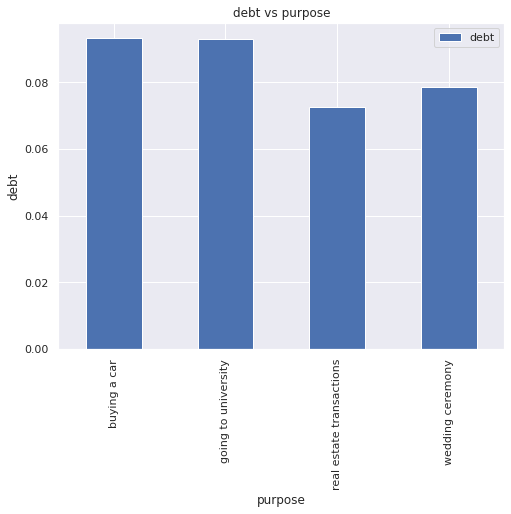

In [533]:
# Memplot purpose vs debt
sns.set()
pd.pivot_table(cs_data, index = 'purpose', values = 'debt').plot(kind= 'bar')
plt.ylabel('debt')
plt.title('debt vs purpose')

In [534]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan
purposes_debt = cs_data[['purpose','debt','dob_years']]
purposes_debt = debt_dict.merge(purposes_debt, on='debt', how='right')
purposes_debt

# Membuat pivot table
pd_pivot = purposes_debt.pivot_table(index='purpose', columns='is_debt', values='dob_years', aggfunc='count')
pd_pivot['ratio'] = pd_pivot.loc[:,'there is a debt']/( pd_pivot.loc[:,'no debt'] + pd_pivot.loc[:,'there is a debt'])
pd_pivot.sort_values(by='ratio', ascending = True)


is_debt,no debt,there is a debt,ratio
purpose,,,
real estate transactions,9924,776,0.072523
wedding ceremony,2118,181,0.078730
going to university,3601,369,0.092947
buying a car,3861,397,0.093236


**Kesimpulan**

* Setelah menganalisis data yang diperoleh, kita dapat mengatakan bahwa peminjam terbaik adalah mereka yang mengambil pinjaman untuk real estate transactions.
* Orang yang melakukan peminjaman untuk pembelian mobil kemungkinan lebih besar tidak akan membayar tepat waktu.

# Kesimpulan Umum <a id='general_conclusion'></a>

**Jumlah anak, status keluarga, pendapatan, dan tujuan pinjaman dapat digunakan untuk meningkatkan validitas sistem penilaian kredit.**

**Risiko pinjaman yang lebih baik (persentase gagal bayar pinjaman yang lebih rendah):**
* Tidak punya anak
* Janda/duda
* Bercerai
* Pendapatan > 30k
* Tujuan pinjaman: real estate transactions dan wedding ceremony

**Risiko pinjaman yang lebih tinggi (persentase gagal bayar pinjaman yang lebih tinggi):**
* Mempunyai anak
* Belum menikah
* Dalam Serikat sipil
* Pendapatan < 30K
* Tujuan pinjaman: going to university dan buying a car